# Suggestions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from k_mean_cluster_util import assign_centroids
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 8)

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.set_index('id', inplace=True)
df = df[~df.index.duplicated(keep='first')]
df = df.drop(['date'], axis=1)
prices = df['price']
df = df.drop('price', axis=1)
df['price'] = prices
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,21436.0,3.37157119,0.92920466,0.0000,3.0000,3.000,4.000,33.0000
bathrooms,21436.0,2.11734932,0.76991279,0.0000,1.7500,2.250,2.500,8.0000
sqft_living,21436.0,2082.70493562,919.14646867,290.0000,1430.0000,1920.000,2550.000,13540.0000
sqft_lot,21436.0,15135.63785221,41538.62060629,520.0000,5040.0000,7614.000,10696.250,1651359.0000
floors,21436.0,1.49619798,0.54038838,1.0000,1.0000,1.500,2.000,3.5000
waterfront,21436.0,0.00760403,0.08687095,0.0000,0.0000,0.000,0.000,1.0000
view,21436.0,0.23511849,0.76709209,0.0000,0.0000,0.000,0.000,4.0000
condition,21436.0,3.41038440,0.65023541,1.0000,3.0000,3.000,4.000,5.0000
grade,21436.0,7.66173726,1.17425650,1.0000,7.0000,7.000,8.000,13.0000
sqft_above,21436.0,1790.96044038,829.02649130,290.0000,1200.0000,1560.000,2220.000,9410.0000


In [4]:
def max_price(df, mp):
    return df[df['price'] <= mp]

def min_bedrooms(df, mb):
    return df[df['bedrooms'] >= mb]

def min_bathrooms(df, mb):
    return df[df['bathrooms'] >= mb]

def min_sqft_living(df, ms):
    return df[df['sqft_living'] >= ms]

def min_floors(df, mf):
    return df[df['floors'] >= mf]

def min_grade(df, mg):
    return df[df['grade'] >= mg]

def min_year_renovated(df, myr):
    if myr == 0:
        return df[df['yr_renovated'] == 0]
    return df[df['yr_renovated'] >= myr]

def min_lat(df, ml):
    return df[df['lat'] >= ml]

def max_lat(df, ml):
    return df[df['lat'] <= ml]

def min_long(df, ml):
    return df[df['long'] >= ml]

def max_long(df, ml):
    return df[df['long'] <= ml]

def min_year_built(df, myb):
    return df[df['yr_built'] >= myb]

In [5]:
coefficients = np.array([ 2.95826076e+02,  1.05354857e+03,  2.64951733e+03,  6.39403846e+02,
                        9.90098381e+02,  1.03389743e+03,  1.34733542e+03,  4.34647043e+03,
                        5.98598209e+02, -1.45318435e+03,  4.93630110e+02,  4.20734260e+03,
                        5.87624109e+01, -4.20810267e+04,  1.13511616e+05,  4.61644477e+04,
                        1.10154058e+05,  1.00671271e+05, -2.57383826e+04,  6.37085098e+04,
                        2.59101446e+04,  8.15426837e+04])

intercept = np.array([477587.54409523])

centroids = np.array([[ 4.75343388e+01, -1.22218856e+02,  3.52609415e+05],
                   [ 4.74142630e+01, -1.22235429e+02,  1.96769369e+05],
                   [ 4.76174581e+01, -1.22215019e+02,  1.01796959e+06],
                   [ 4.76152447e+01, -1.22206690e+02,  5.03714999e+05],
                   [ 4.76244488e+01, -1.22195004e+02,  8.71409893e+05],
                   [ 4.76185047e+01, -1.22186274e+02,  7.58020669e+05],
                   [ 4.74511331e+01, -1.22220358e+02,  2.77490028e+05],
                   [ 4.76151207e+01, -1.22208065e+02,  5.76740093e+05],
                   [ 4.76008047e+01, -1.22218290e+02,  4.28626376e+05],
                   [ 4.76213542e+01, -1.22201022e+02,  6.60373193e+05]])

mu = np.array([ 3.33060336e+00,  2.05666184e+00,  1.97976990e+03,  1.47979336e+04,
                1.47819781e+00,  1.71706542e-01,  3.40795708e+00,  7.53544426e+00,
                2.67357574e+02,  1.97102051e+03,  7.61931686e+01,  4.75566330e+01,
               -1.22212570e+02,  9.12114158e-02,  3.19024548e-02,  1.13444656e-01,
                5.06251343e-02,  7.08874986e-02,  1.58650130e-01,  9.58921835e-02,
                1.46825165e-01,  8.16037953e-02])

sigma2 = np.array([[8.40753734e-01, 5.09700418e-01, 6.01082938e+05, 1.63552781e+09,
                   2.89048374e-01, 4.04463887e-01, 4.16067839e-01, 1.07746780e+00,
                   1.67958125e+05, 8.49030884e+02, 1.46240641e+05, 1.99611578e-02,
                   2.02456526e-02, 8.28919038e-02, 3.08846850e-02, 1.00574784e-01,
                   4.80622351e-02, 6.58623725e-02, 1.33479938e-01, 8.66968483e-02,
                   1.25267491e-01, 7.49443844e-02]])

try:
    import joblib
    coefficients, intercept, centroids, mu, sigma2 = joblib.load('trained_data.data')
    print('Loaded Data!')
except:
    print(f'Did not find trained data, so recommencing with hardcoded data!')

Loaded Data!


In [6]:
def get_cluster(lat, long, price, centroids):
    k, _ = centroids.shape
    idx = assign_centroids(np.array([[lat, long, price]]), centroids)
    one_hot = np.zeros(k - 1)
    if idx[0] != 0: one_hot[idx[0] - 1] = 1
    return one_hot

In [7]:
def assemble(house, centroids):
    temp = house.drop(labels=['price', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'waterfront', 'zipcode'])
    X = temp.values
    one_hot = get_cluster(temp['lat'], temp['long'], house.price, centroids) 
    X = np.concatenate([X, one_hot])
    return X

def z_normalize(X, mu, sigma2):
    return (X - mu) / np.sqrt(sigma2)

def predict(X, coefficients, intercept):
    return np.dot(coefficients, X) + intercept

In [8]:
def ask_about(msg):
    print(f'{msg} (Y, N)>>', end=' ')
    res = input().lower()
    return True if res == 'y' else False

In [9]:
# vars
points = []

def filter(df_in, min_return = 10):
    df = deepcopy(df_in)
    if ask_about("Filter by price?"):
        m_price = int(input('Maximum price: '))
        df = max_price(df, m_price)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by sqft living?"):
        m_sqft_living = int(input('Min sqft living: '))
        df = min_sqft_living(df, m_sqft_living)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by number of bedrooms?"):
        m_bed = int(input('Min bedrooms: '))
        df = min_bedrooms(df, m_bed)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by number of bathrooms?"):
        m_bath = int(input('Min bathrooms: '))
        df = min_bathrooms(df, m_bath)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by number of floors?"):
        floors = int(input('Floors: '))
        df = min_floors(df, floors)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df
        
    if ask_about("Filter by year built?"):
        year = int(input('Year Built: '))
        df = min_year_built(df, year)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df
        
    if ask_about("Filter by grade?"):
        grade = int(input('Grade: '))
        df = min_grade(df, grade)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by year of renovated?"):
        yr = int(input('Min year of renovation (0 if no renovation): '))
        df = min_year_renovated(df, yr)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df

    if ask_about("Filter by lat and long?"):
        min_lat = int(input('Min lat: '))
        min_long = int(input('Min long: '))
        max_lat = int(input('Max lat: '))
        max_long = int(input('Max long: '))
        df = min_lat(df, min_lat)
        df = max_lat(df, max_lat)
        df = min_long(df, min_long)
        df = max_long(df, max_long)
        print(f'{df.shape[0]} houses have been found!')
        
        if df.shape[0] <= min_return: return df
    
    return df


def predict_value(df_in):
    df = deepcopy(df_in)
    predictions = np.zeros(df.shape[0])
    for i in range(df.shape[0]):
        X = assemble(df.iloc[i], centroids)
        X_norm = z_normalize(X, mu, sigma2)
        predictions[i] = predict(X_norm, coefficients, intercept)
    df['PV'] = predictions.astype(np.int64)
    return df


def filter_houses_NTP(df_in, long, lat, number_to_filter=10):
    df = deepcopy(df_in)
    df['dist'] = np.sqrt((df['long'] - long) ** 2 + (df['lat'] - lat) ** 2)
    return df.sort_values(by=['dist'], ascending=True).drop('dist', axis=1).iloc[:number_to_filter]
    

# Run functions
new_df = filter(df)
new_df = predict_value(new_df)

Filter by price? (Y, N)>> y
Maximum price: 1340000
20725 houses have been found!
Filter by sqft living? (Y, N)>> n
Filter by number of bedrooms? (Y, N)>> y
Min bedrooms: 4
8196 houses have been found!
Filter by number of bathrooms? (Y, N)>> y
Min bathrooms: 2
6663 houses have been found!
Filter by number of floors? (Y, N)>> y
Floors: 2
4193 houses have been found!
Filter by year built? (Y, N)>> y
Year Built: 2011
578 houses have been found!
Filter by grade? (Y, N)>> y
Grade: 10
60 houses have been found!
Filter by year of renovated? (Y, N)>> y
Min year of renovation (0 if no renovation): 0
60 houses have been found!
Filter by lat and long? (Y, N)>> n


In [10]:
if ask_about('Do you want the house to be close to a specific point?'):
    long = float(input('Input longtitude: '))
    lat = float(input('Input latitude: '))
    num = int(input('Find N near houses; N = '))
    points.append([long, lat])
    new_df = filter_houses_NTP(new_df, long, lat, num)

Do you want the house to be close to a specific point? (Y, N)>> y
Input longtitude: -122
Input latitude: 47.66
Find N near houses; N = 20


In [11]:
new_df.sort_values(by=['price', 'sqft_living', 'grade', 'bedrooms', 'floors', 'yr_built', 'bathrooms'], 
                   ascending=False).drop('PV', axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
324069112,4,4.00,4420,16526,2.0,0,0,3,11,4420,0,2013,0,98075,47.5914,-122.027,3510,50447,1325000.0
8691440220,5,4.00,4360,8030,2.0,0,0,3,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185,1289990.0
4233600260,5,4.00,4180,12042,2.0,0,0,3,10,4180,0,2014,0,98075,47.5959,-122.014,1800,6052,1255780.0
1024069215,5,4.25,4150,12015,2.0,0,0,3,10,4150,0,2014,0,98075,47.5816,-122.021,3230,27520,1206690.0
7237550110,4,3.25,3750,74052,2.0,0,0,3,10,3750,0,2013,0,98053,47.6580,-122.006,4920,74052,1180000.0
4233600150,5,4.25,4010,8252,2.0,0,0,3,10,4010,0,2015,0,98075,47.5974,-122.013,3370,8252,1150000.0
1024069027,4,3.25,3740,11467,2.0,0,0,3,10,3740,0,2014,0,98029,47.5810,-122.022,2510,27520,1139990.0
8691440330,5,3.50,4280,6530,2.0,0,3,3,10,4280,0,2014,0,98075,47.5941,-121.973,3960,6863,1138990.0
6790830090,4,3.50,4220,8417,3.0,0,0,3,10,4220,0,2012,0,98075,47.5869,-122.054,3730,8435,1060000.0


In [12]:
if ask_about('Do you want to select a house?'):
    select_id = int(input('House ID >> '))
else: select_id = -1

Do you want to select a house? (Y, N)>> y
House ID >> 8691440220


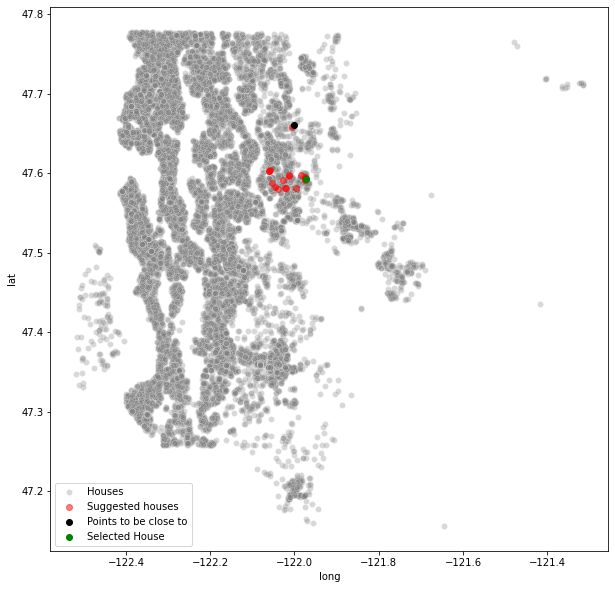

In [13]:
points_np = np.array(points)
if select_id in new_df.index:
    to_plot = new_df.drop(select_id)
else: to_plot = new_df
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data=df.drop(new_df.index), x='long', y='lat', color='gray', alpha=0.3, ax=ax, label='Houses');
ax.scatter(data=to_plot, x='long', y='lat', color='red', alpha=0.5, label='Suggested houses');

if points_np.size != 0:
    ax.scatter(x=points_np[:, 0], y=points_np[:, 1], color='black', alpha=1, label='Points to be close to');

if select_id in new_df.index:
    ax.scatter(data=df[df.index == select_id], x='long', y='lat', color='green', marker='o',
               label='Selected House')
else: print('not found!')
    
ax.legend();

In [14]:
def analyze_the_house(new_df, select_id):
    if select_id not in new_df.index: 
        print(f'House with ID {select_id} is not found!')
        return
    
    difference = new_df.loc[select_id].price - new_df.loc[select_id].PV
    if difference < 0:
        print(f'The house is sold {int(difference * -1)} less than its estimated value.')
    elif difference > 0:
        print(f'The house is sold {int(difference)} more than its estimated value.')
    else:
        print(f'The house is sold by its estimated value.')
        
    print('-----------------------------------------------------------------')
    print(df.loc[select_id])
        
analyze_the_house(new_df, select_id)

The house is sold 268107 more than its estimated value.
-----------------------------------------------------------------
bedrooms               5.0000
bathrooms              4.0000
sqft_living         4360.0000
sqft_lot            8030.0000
floors                 2.0000
waterfront             0.0000
view                   0.0000
condition              3.0000
grade                 10.0000
sqft_above          4360.0000
sqft_basement          0.0000
yr_built            2015.0000
yr_renovated           0.0000
zipcode            98075.0000
lat                   47.5923
long                -121.9730
sqft_living15       3570.0000
sqft_lot15          6185.0000
price            1289990.0000
Name: 8691440220, dtype: float64
